# ポルトガルのリスボンにある卸売業者が顧客から集めたデータ分析

# 導入

## 教師なし学習とは何か記述せよ

教師なし学習はデータに正解ラベルがない学習方法です。

教師あり学習が目的となる値や分類を予測するのに対し、

- クラスタリング
    - データ間の隠れたパターンや関係性を見つけ出すために使われる。

- 次元削減
    - 前処理として他機械学習の精度をあげる。
    - 前処理として他機械学習の高速化に貢献できる。
    - 人間が理解できる2,3次元に削減することでデータを可視化できる。

例　
顧客データから顧客のグルーピングを行ってターゲットを絞った新商品の開発に使われる。


 ## 必要なライブラリをimport

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

 # データ取得

In [2]:
#csvを読み込むコードを記述
data =pd.read_csv('./Wholesale customers data.csv')

## データを眺める

In [3]:
print("サンプルの数：{} 　特徴量の数：{}\n".format(*data.shape))
print("各特徴量の型\n",data.dtypes,"\n")
print("統計量の要約")
display(data.describe())
display(data.head())

サンプルの数：440 　特徴量の数：8

各特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 

統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


## 不要な特徴量を消す

In [5]:
#元のデータはdata_originalに格納しておく
data_original = data.copy()

In [6]:
#dataからChannelとRegionの2列を削除するコードを記述
data=data.drop(['Channel','Region'],axis=1)
display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## scatter matrixを描く

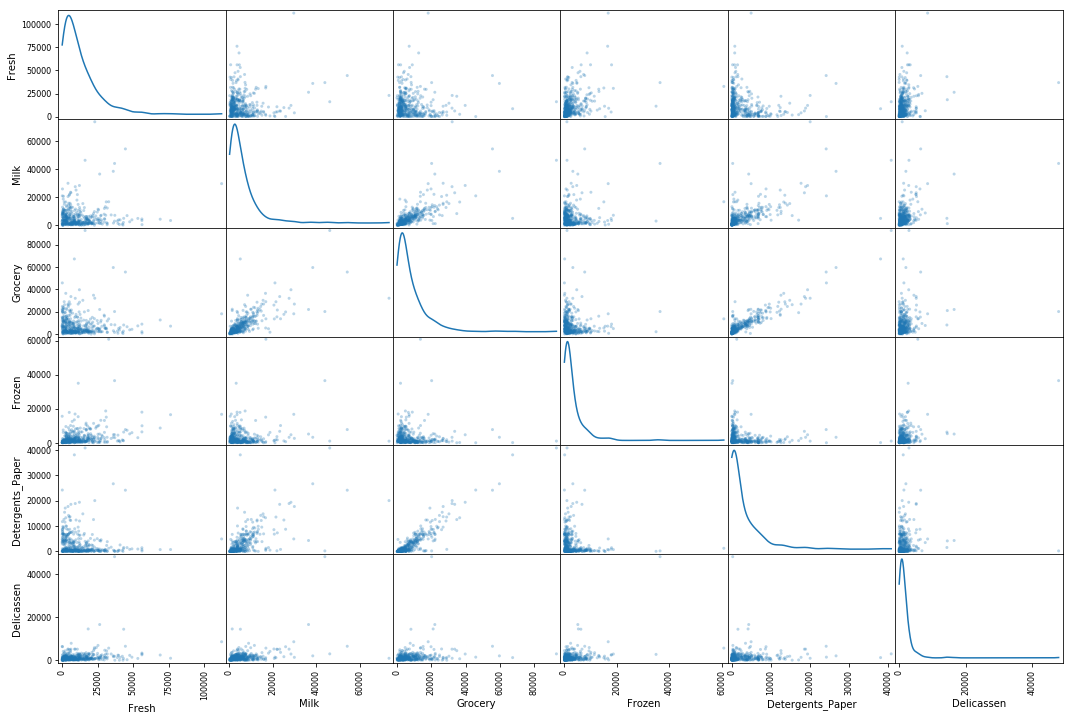

In [7]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (18,12), diagonal = 'kde');

# Feature Scaling

In [8]:
#dataに対して適切なFeature Scalingを行うコードを記述
import numpy as np
data_fs=np.log(data)

In [9]:
data_fs

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


## なぜFeature Scalingが必要なのか記述せよ

今回の元の値でプロットしたところで、左下にデータが固まっている。

今回の目的はクラスタリング、つまりデータをいくつかの塊に分けて可視化したい。

そのままプロットすると見づらくなってしまうので今回はデータの可視化の観点からフィーチャースケーリングを行う。

logを取るのは今回の値の最小値が１なので対数を取ると妥当だと考えた。
#数値が大きいので、log変換で値を小さくして処理速度を速くするため

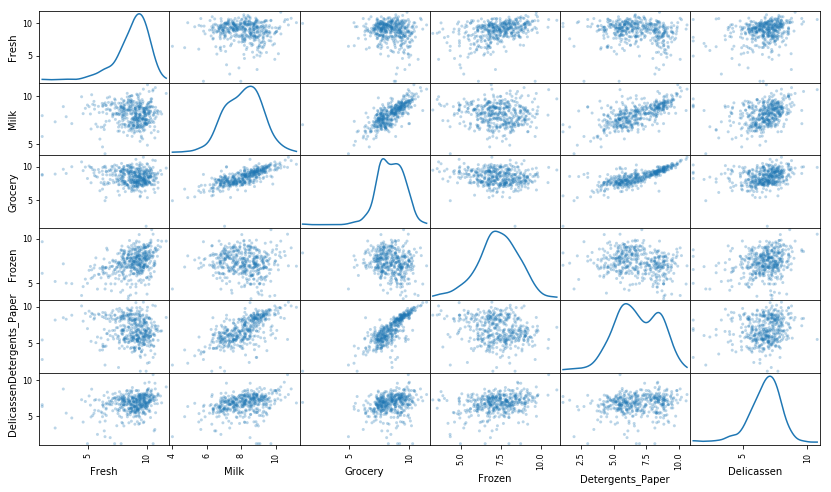

In [10]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Feature Extraction

## PCAの実行

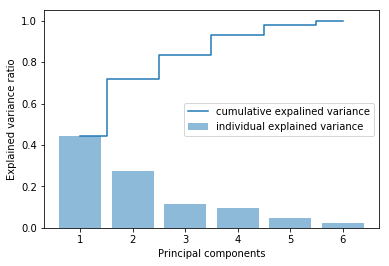

In [11]:
#data_fsに対しPCAを行い分散説明率の累積を確認
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# PCAを施して学習
# pca = PCA(n_components=3)
# data_fs = pca.fit_transform(data_fs)


pca = PCA(n_components=None)
data_pca = pca.fit_transform(data_fs)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [12]:
eigenvectors = pca.components_
print("固有ベクトル")
print(eigenvectors)

固有ベクトル
[[ 0.17371704 -0.394463   -0.45436364  0.17219603 -0.74551495 -0.1494356 ]
 [-0.68513571 -0.16239926 -0.06937908 -0.487691   -0.04191162 -0.50970874]
 [-0.67351166  0.03306794 -0.03218274  0.28481122 -0.21824404  0.64459672]
 [-0.21432619  0.0185577   0.06448674  0.80608348  0.19005006 -0.51348977]
 [-0.00082162  0.72228834  0.34799325 -0.03624337 -0.56366476 -0.19536639]
 [-0.02927638  0.54303508 -0.81390826 -0.0174477   0.20244363 -0.02283197]]


In [13]:
#固有値（各主成分におけるデータの分散）
eigenvalue= pca.explained_variance_
eigenvalue

array([4.83781898, 3.02459061, 1.27047648, 1.05179707, 0.50039796,
       0.25095302])

In [14]:
(eigenvalue[0] + eigenvalue[1]) / np.sum(eigenvalue)

0.7189452317370728

第２主成分で７０％超えていることが確認できた。

In [15]:
#分散説明率が70%を超える数の主成分を選び、data_pcaに格納する
data_pca= eigenvectors[0:2]
data_pca

array([[ 0.17371704, -0.394463  , -0.45436364,  0.17219603, -0.74551495,
        -0.1494356 ],
       [-0.68513571, -0.16239926, -0.06937908, -0.487691  , -0.04191162,
        -0.50970874]])

## なぜPCAを行うのか記述せよ

- 次元削減により、クラスタリングで使用する次元を絞込み、可視化しやすくするため。

- 一般的には次元削減を行ってより少ない特徴数にすることで学習の精度や高速化を行うため。


## クラスタリングとは何か記述せよ

クラスタリングについての説明を記述してください。その際、以下の観点を含めてください。

- いつ何に使うのか
- 階層的手法と非階層的手法との違い
- クラス分類（classification）との比較

### 回答
クラスタリングとはデータの集合をクラスタという部分集合に分ける手法。

隠れたグループや関係性が分かることが目的で、ECサイトのレコメンデーションや商品開発のターゲット層を見つけ出すのに使われる。

 階層的手法は関係や距離が近いものから順番に組み合わせていくので階層によって任意のクラスターに分けることができる。（樹状図を）
 
 非階層的手法は分ける数を指定して分割を行う手法ですべての距離を計算する必要がないので大規模なデータをさっと分けたいときに用いられます。逆に開始点がランダムに決まるため結果が変わることがあるので再現性が求められる場面では用いられない。
 
 またクラス分類とクラスタリングは名前こそ似ているが、クラス分類は正解データがあるのに対し、クラスタリングは正解がなく分類数も人間の主観で決めることができる。正解がないため、出てきたパターンから人間が解釈を行ってアクションにつなげる必要がある。

In [16]:
data_fs.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [17]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(data_fs, metric='euclidean')))#, columns=['Fresh', 'Milk'])
print(row_dist)

          0         1         2         3         4         5         6    \
0    0.000000  2.228506  3.088862  4.370853  3.335270  1.310767  1.647395   
1    2.228506  0.000000  1.542136  3.265387  1.989303  1.362980  2.176584   
2    3.088862  1.542136  0.000000  3.432707  1.651791  2.295854  3.342786   
3    4.370853  3.265387  3.432707  0.000000  2.407488  3.264068  3.560555   
4    3.335270  1.989303  1.651791  2.407488  0.000000  2.412860  3.235635   
5    1.310767  1.362980  2.295854  3.264068  2.412860  0.000000  1.561235   
6    1.647395  2.176584  3.342786  3.560555  3.235635  1.561235  0.000000   
7    2.333955  0.781000  1.337492  2.907066  1.699507  1.492109  2.111804   
8    1.599339  2.094442  3.139531  3.410168  3.259593  1.245439  1.008493   
9    2.347990  1.169375  1.922346  4.240870  2.747458  2.108975  2.523150   
10   3.499069  1.479770  1.955458  3.412324  2.578349  2.673123  2.996408   
11   3.458258  3.243439  4.047937  1.980645  3.299428  2.688773  2.348229   

## 樹状図を描く

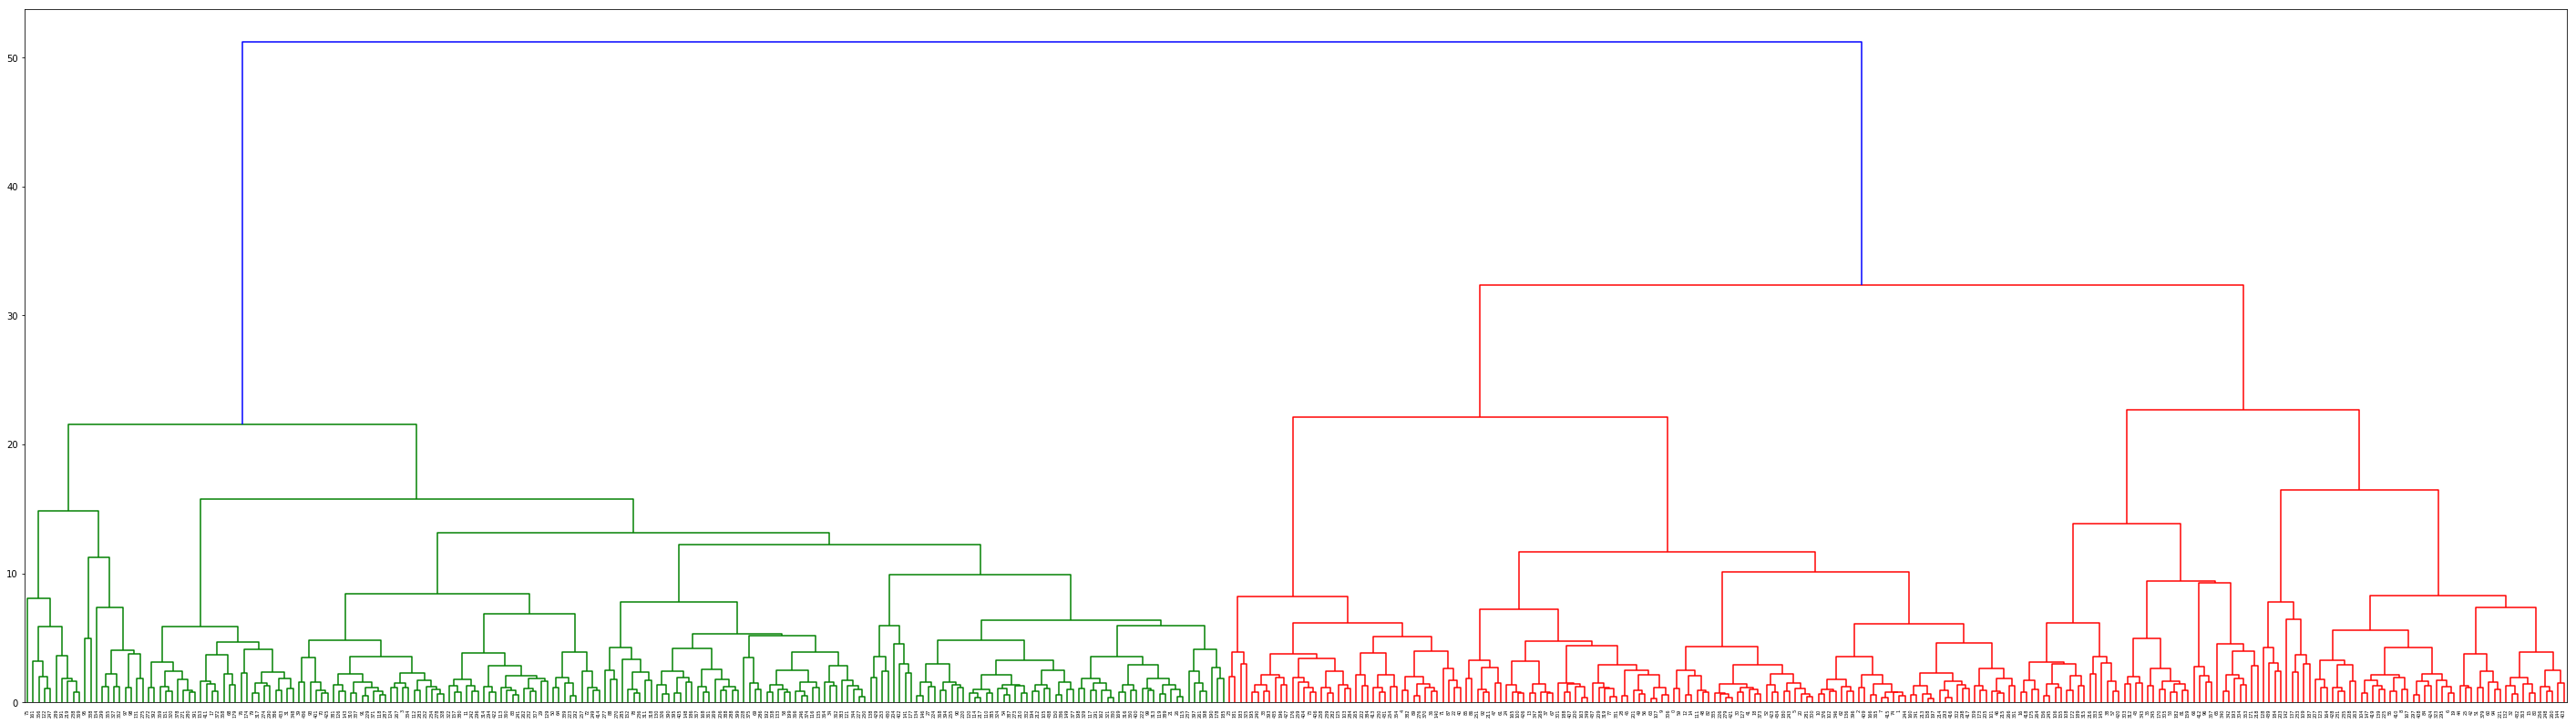

In [18]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

#ward法を使う

plt.figure(figsize=(50,14))
#row_clusters = linkage(pdist(data_fs, metric='euclidean'), method='complete')
row_clusters = linkage(data_fs, method='ward')
row_dender = dendrogram(row_clusters)#, labels=name)

plt.show()

 ## k-meansにおけるkの値の検討
  ### エルボー法

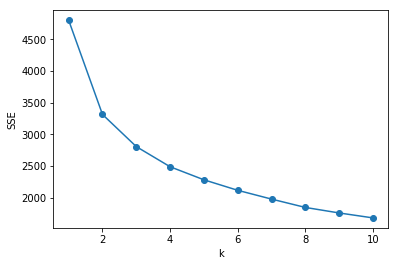

In [19]:
#クラスタ数を検討するためのコードを記述
#エルボー法
from sklearn.cluster import KMeans

SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data_fs)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

### シルエット分析

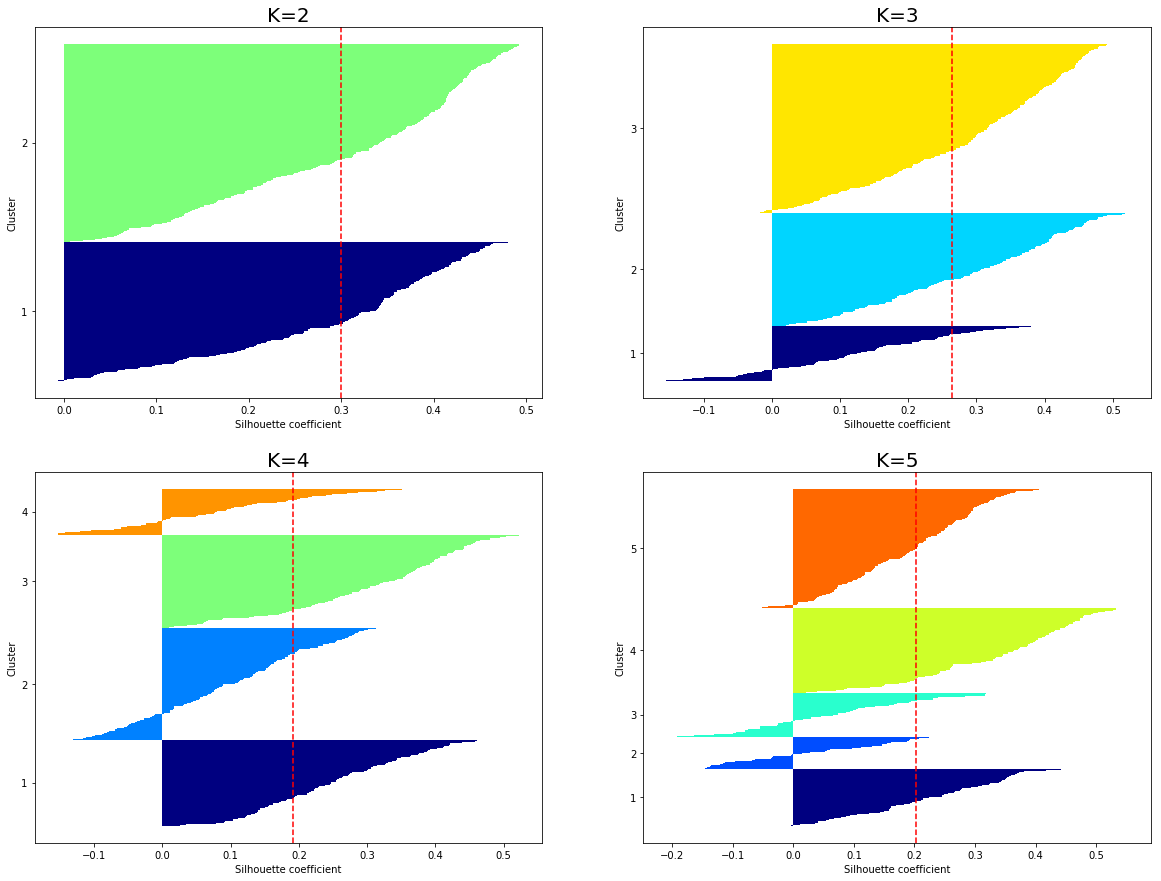

In [20]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

plt.figure(figsize=(20,15))
for j in range(2,6):
    plt.subplot(2,2,j-1)
    km = KMeans(n_clusters=j, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(data_fs)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data_fs, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title('K='+str(j),fontsize=20)
plt.show()


k=2  
理由：エルボー法の図から、k=2からk=3にかけての傾きがk=2までのそれよりも若干緩やかに変化していることが確認できる。
シルエット分析もn_clusters=2にしたときに二つのクラスタの形がほぼ似ているため。

## k-meansの実行

In [64]:
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_fs)

## クラスタリングの可視化

In [23]:
#散布図を描くコードを記述
#中心点もプロットする
pca_vector = data_pca
pca_vector

array([[ 0.17371704, -0.394463  , -0.45436364,  0.17219603, -0.74551495,
        -0.1494356 ],
       [-0.68513571, -0.16239926, -0.06937908, -0.487691  , -0.04191162,
        -0.50970874]])

In [63]:
data_pca = np.dot( data_fs, pca_vector.T)

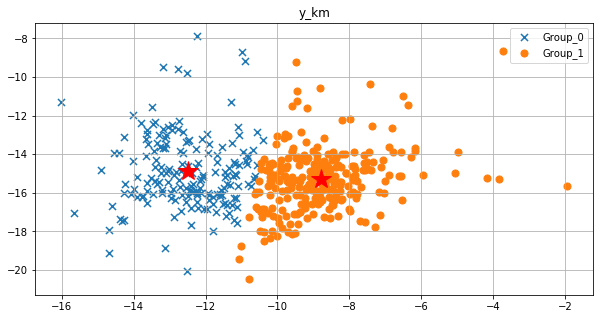

In [27]:
plt.figure(figsize =(10,5))
plt.title('y_km')

data_zero = data_pca[y_km==0]
data_one = data_pca[y_km==1]

# plt.scatter(data_pca[:,0], data_pca[:,1], c=y_km , marker='o', s=50)
plt.scatter(data_zero[:,0], data_zero[:,1], marker='x', s=50, label='Group_0')
plt.scatter(data_one[:,0], data_one[:,1], marker='o', s=50, label='Group_1')
plt.grid()
plt.hold(True)
centroid = np.dot(km.cluster_centers_, pca_vector.T)
plt.plot(centroid[:,0], centroid[:,1], "*", MarkerSize =20, MarkerFaceColor = 'r', MarkerEdgeColor = 'r')
plt.legend()
plt.show()

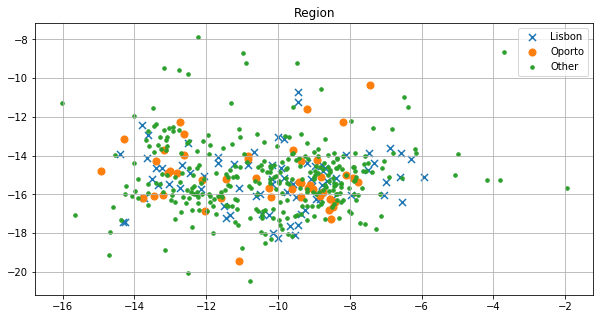

In [28]:
plt.figure(figsize =(10,5))
plt.title('Region')

data_Lisbon= data_pca[data_original["Region"]==1]
data_Oporto = data_pca[data_original["Region"]==2]
data_Other = data_pca[data_original["Region"]==3]

plt.scatter(data_Lisbon[:,0], data_Lisbon[:,1], marker='x', s=50, label='Lisbon')
plt.scatter(data_Oporto[:,0], data_Oporto[:,1], marker='o', s=50, label='Oporto')
plt.scatter(data_Other[:,0], data_Other[:,1],marker='.', s=50, label='Other')

plt.grid()
# plt.hold(True)
#centroid = np.dot(km.cluster_centers_, pca_vector.T)
#plt.plot(centroid[:,0], centroid[:,1],"*", MarkerSize =20, MarkerFaceColor = 'r', MarkerEdgeColor = 'r')
plt.legend()
plt.show()

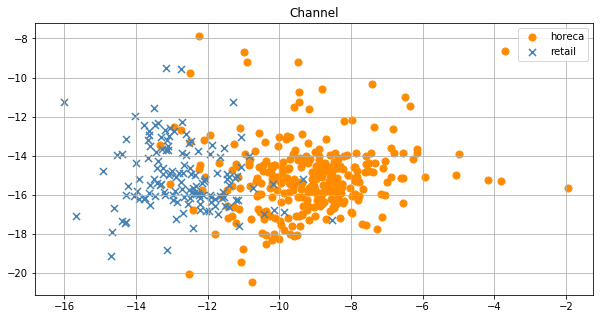

In [29]:
plt.figure(figsize =(10,5))
plt.title('Channel')

data_horeca= data_pca[data_original["Channel"]==1]
data_retail = data_pca[data_original["Channel"]==2]

plt.scatter(data_horeca[:,0], data_horeca[:,1], marker='o', color= 'darkorange', s=50, label='horeca')
plt.scatter(data_retail[:,0], data_retail[:,1], marker='x', color='steelblue', s=50, label='retail')

plt.grid()
# plt.hold(True)
# centroid = np.dot(km.cluster_centers_, pca_vector.T)
# plt.plot(centroid[:,0], centroid[:,1], "*", MarkerSize =20, MarkerFaceColor = 'r', MarkerEdgeColor = 'r')
plt.legend()
#plt.show()

グループと地域と業種で第一主成分、第二主成分でプロットした場合、
グループと業種が近い傾向が見られる。

これを詳しく見ていく。

In [30]:
data_y_km =pd.concat([data_original,pd.DataFrame(y_km)],axis=1)

各データごとに合計金額を表す'TotalPrice'を計算し、特徴量として加える。

In [31]:
data_y_km['TotalPrice']= data_y_km['Fresh']+data_y_km['Milk']+data_y_km['Grocery']+\
                                               data_y_km['Frozen']+data_y_km['Detergents_Paper']+data_y_km['Delicassen']

In [32]:
data_original['TotalPrice']= data_original['Fresh']+data_original['Milk']+data_original['Grocery']+\
                                               data_original['Frozen']+data_original['Detergents_Paper']+data_original['Delicassen']

In [33]:
df_group0 = data_y_km[data_y_km[0] == 0].describe()
df_group1 = data_y_km[data_y_km[0] == 1].describe()
df_group0 = df_group0.drop(0, axis=1).loc['mean','Fresh':]
df_group1 = df_group1.drop(0, axis=1).loc['mean','Fresh':]

In [34]:
data_original['TotalPrice']= data_original['Fresh']+data_original['Milk']+data_original['Grocery']+\
                                               data_original['Frozen']+data_original['Detergents_Paper']+data_original['Delicassen']
df_horeca=data_original[data_original['Channel']==1].describe()
df_retail=data_original[data_original['Channel']==2].describe()
df_horeca = df_horeca.loc['mean','Fresh':]
df_retail = df_retail.loc['mean','Fresh':]

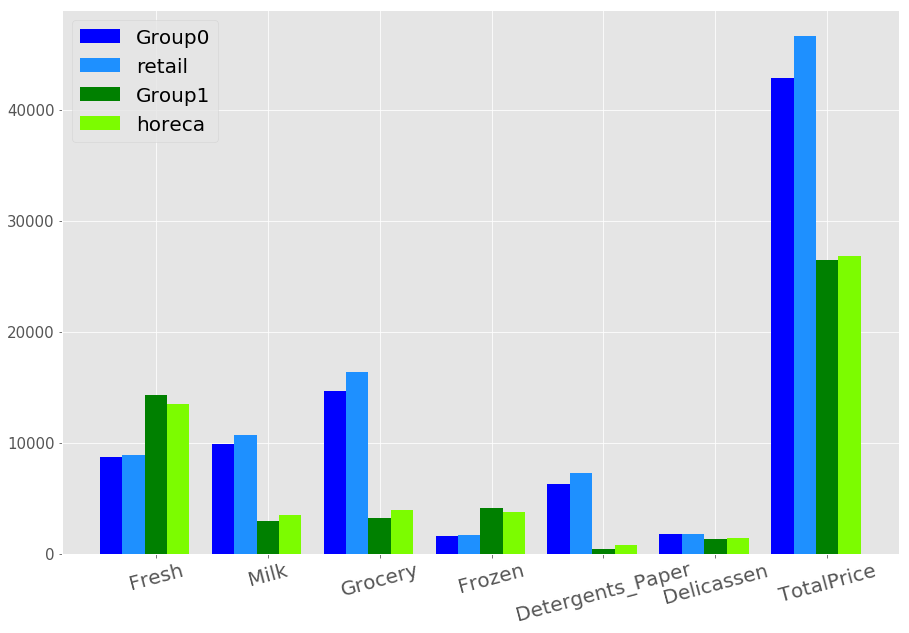

In [62]:
# plt.figure(figsize=(20,20))

plt.figure(figsize=(15,10))

X1=[0,1.5,3.0,4.5,6.0,7.5,9.0]
width = [0.3,0.3,0.3,0.3,0.3,0.3,0.3]
X2 = list(np.array(X1)+np.array(width))
X3 = list(np.array(X2)+np.array(width))
X4 = list(np.array(X3)+np.array(width))

plt.bar(X1, df_group0, color='b', width=0.3, label='Group0')
plt.bar(X2,df_retail, color='dodgerblue', width=0.3, label='retail')
plt.bar(X3,df_group1, color='g', width=0.3, label='Group1')
plt.bar(X4,df_horeca, color='lawngreen', width=0.3, label='horeca')

# 凡例
plt.legend(loc=2, fontsize=20)

# X軸の目盛りを置換
plt.xticks(list(np.array(X1)+np.array(width)*2), list(data_original.columns[2:]), fontsize = 20, rotation=15)
plt.yticks(fontsize = 15)
plt.show()

それぞれの商品カテゴリーの平均金額でグループと業種で見た場合、

グループ０と小売店、グループ１とhorecaが同じような傾向があることが分かる。

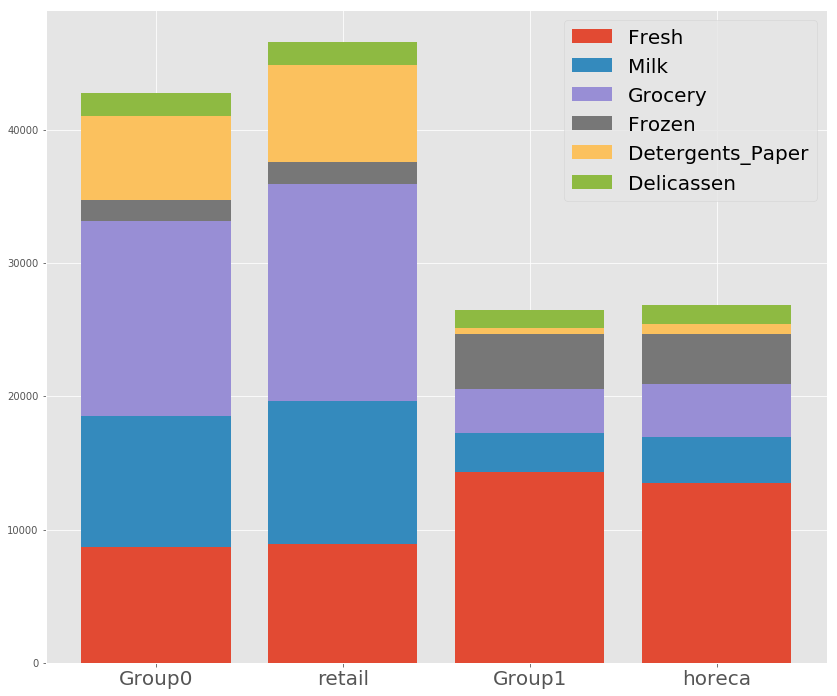

In [53]:
plt.figure(figsize=(14,12))

data = []
bar = []
colors = ['b', 'teal', 'y', 'c', 'darkorange', 'pick']
positions = range(1, 5) #x軸の位置
len_column  = 6#len(df_group0.columns)
for i in range(len_column):
    data.append(np.array([df_group0[i], df_retail[i], df_group1[i], df_horeca[i]]))
    bottom = np.array([.0, .0, .0, .0])
    for j in range(i):
        bottom += data[j]
    bottom
    if i == 0:
        bar.append(plt.bar(positions, data[i], align = 'center'))
    else:
        bar.append(plt.bar(positions, data[i], align = 'center', bottom = bottom))  #,  color= colors[i]))
    
x_labels = ['Group0', 'retail', 'Group1','horeca'] #x軸に表示するラベル

plt.xticks(positions, x_labels,fontsize=20) #x軸の値の変更
# plt.ylim(0, 30000) #y軸の表示範囲 
plt.legend((bar),('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'),fontsize=20) #凡例の表示
plt.style.use('ggplot')
plt.show() #グラフの表示

## 卸売業者への報告

- 分析したグループと業種が近い傾向があった。
- 小売店はhoreca(ホテル　レストラン　カフェ）より顧客単価が1.7倍高い。
- 小売店はミルク、食料品、洗剤と紙類がよく売れる傾向がある。
- horeca(ホテル　レストラン　カフェ）は生鮮食品と冷凍食品がよく売れる傾向がある。
- 販売傾向は地域によっては分けられず業種によって変わる。ー＞別の地域に進出する場合は取引業種の割合で用意する在庫を調整すればよい。

### おまけ

第一主成分のベクトルで値が大きい、Milk、Fresh、Detergents_Paperを軸として、
- クラスター０，１
- 小売とhoreca(ホテル、レストラン、カフェ)
を三次元で描画してみた。

主成分の重みが大きい軸を選択しているので第一主成分軸でみたときと同じような見た目になっている。

※当初は見栄えがよいかと思ったが、ここで言いたいことは主成分軸でプロットした結果と同じことを言っているため説明としては省きました。

In [ ]:
pca_vector[0]

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# from scipy import genfromtxt
# %matplotlib notebook



# # グラフ作成
# fig = plt.figure()
# #ax = Axes3D(fig)
# #ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111, projection='3d')


# # 軸ラベルの設定
# ax.set_xlabel("Milk")
# ax.set_ylabel("Grocery")
# ax.set_zlabel("Detergents_Paper")

# # 表示範囲の設定
# ax.set_xlim(0, 15)
# ax.set_ylim(0, 15)
# ax.set_zlim(0, 15)

# # 抽出条件設定
# data_zero = data_fs[y_km==0]
# data_one = data_fs[y_km==1]


# # グラフ描画
# ax.plot(data_zero['Milk'], data_zero['Grocery'], data_zero["Detergents_Paper"], "x", color="steelblue", ms=4, mew=0.5, label='Group_0')
# ax.plot(data_one['Milk'], data_one['Grocery'], data_one["Detergents_Paper"], "o", MarkerEdgeColor = 'r', color="darkorange", ms=4, mew=0.5, label='Group_1')
# plt.legend()
# plt.show()

In [ ]:
# # グラフ作成
# fig = plt.figure()
# plt.title('Channel')
# ax = fig.add_subplot(111, projection='3d')

# # 軸ラベルの設定
# ax.set_xlabel("Milk")
# ax.set_ylabel("Grocery")
# ax.set_zlabel("Detergents_Paper")

# # 表示範囲の設定
# ax.set_xlim(0, 15)
# ax.set_ylim(0, 15)
# ax.set_zlim(0, 15)

# # 抽出条件設定
# data_horeca= data_fs[data_original["Channel"]==1]
# data_retail = data_fs[data_original["Channel"]==2]

# # グラフ描画
# #ax.plot(data_zero['Milk'], data_zero['Grocery'], data_zero["Detergents_Paper"], "x", color="steelblue", ms=4, mew=0.5, label='Group_0')
# ax.plot(data_horeca['Milk'], data_horeca['Grocery'], data_horeca["Detergents_Paper"], 'o', color= 'darkorange', ms=4, mew=0.5, label='horeca')
# ax.plot(data_retail['Milk'], data_retail['Grocery'], data_retail["Detergents_Paper"], 'x', color='steelblue', ms=4, mew=0.5, label='retail') # "o", MarkerEdgeColor = 'r', color="darkorange", ms=4, mew=0.5, label='data_retail')
# plt.legend()
# plt.show()